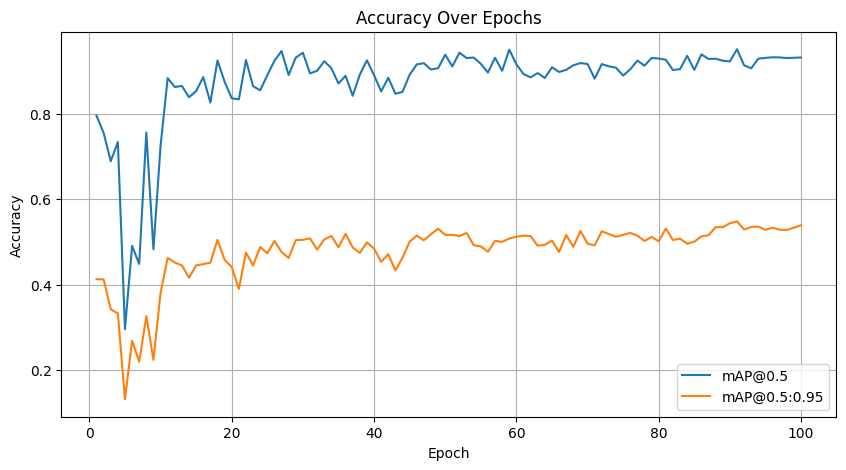

In [16]:
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
log_dir = glob('runs/detect/train2')

results = pd.read_csv(os.path.join(log_dir[0], 'results.csv'))

epochs = [i for i in range(1 , 101)]  
mAP_0_5 = results['metrics/mAP50(B)']  
mAP_0_5_0_95 = results['metrics/mAP50-95(B)'] 

plt.figure(figsize=(10, 5))
plt.plot(epochs, mAP_0_5, label='mAP@0.5')
plt.plot(epochs, mAP_0_5_0_95, label='mAP@0.5:0.95')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

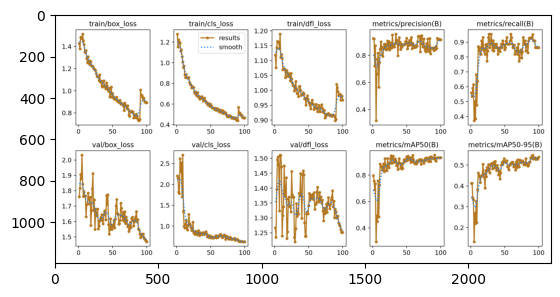

In [15]:
import cv2
import matplotlib.pyplot as plt
resu = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/runs/detect/train2/results.png"
img = cv2.imread(resu)
plt.imshow(img)

In [2]:
from ultralytics import YOLO
model = YOLO('best_license_plate_model.pt')

In [ ]:
import cv2
test_img = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/datasets/cars_license_plate_new/test/images/Cars9.png"
results = model.predict(test_img)
img = cv2.imread(test_img )
img = cv2.cvtColor(img , cv2.COLOR_BGR2RGB)

plt.imshow(img)
results

In [4]:
for result in results:
    for box in result.boxes:
        print(box)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8507])
data: tensor([[164.7946, 222.2908, 272.9734, 245.3270,   0.8507,   0.0000]])
id: None
is_track: False
orig_shape: (333, 442)
shape: torch.Size([1, 6])
xywh: tensor([[218.8840, 233.8089, 108.1788,  23.0362]])
xywhn: tensor([[0.4952, 0.7021, 0.2447, 0.0692]])
xyxy: tensor([[164.7946, 222.2908, 272.9734, 245.3270]])
xyxyn: tensor([[0.3728, 0.6675, 0.6176, 0.7367]])


In [5]:
def predict_and_plot(path_test_car):
    
    results = model.predict(path_test_car, device='cpu')
    image = cv2.imread(path_test_car)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            confidence = box.conf[0]

            # draw reactage and box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{confidence*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    plt.imshow(image)
    plt.axis('off')  
    plt.show()  


image 1/1 C:\Users\singh\College assignemnt\Resume Projects\Object detection\datasets\cars_license_plate_new\test\images\Cars9.png: 512x640 1 license_plate, 148.9ms
Speed: 6.2ms preprocess, 148.9ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)


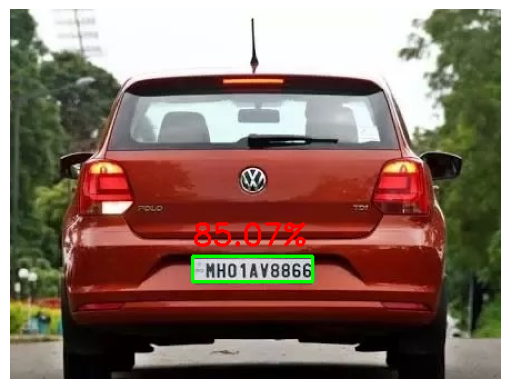

In [6]:
test_img = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/datasets/cars_license_plate_new/test/images/Cars9.png"

predict_and_plot(test_img)

In [ ]:
test_img = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/datasets/cars_license_plate_new/test/images/Cars39.png"
predict_and_plot(test_img)

### Text Extraction 

In [ ]:
%pip install pytesseract

In [ ]:
%pip install pytesseract

In [15]:
import pytesseract
pytesseract.pytesseract.tesseract_cmd = r"C:\Program Files\Tesseract-OCR\tesseract.exe"


In [24]:
test_img = "datasets/cars_license_plate_new/test/images/Cars415.png"
# image = cv2.imread(test_img)
# image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
text = pytesseract.image_to_string(test_img, config='--psm 6')
print(f"Detected text: {text}")

Detected text: 


In [16]:
### updated predict function 
# import pytesseract
import pytesseract
def predict_and_plot_text(path_test_car):
    
    results = model.predict(path_test_car, device='cpu')
    image = cv2.imread(path_test_car)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            con= box.conf[0]

            # draw reactage and box
            cv2.rectangle(image, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(image, f'{con*100:.2f}%', (x1, y1 - 10), 
                        cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
            
            # read text also
            area_of_intrest = image[y1:y2, x1:x2]
            text = pytesseract.image_to_string(area_of_intrest, config='--psm 6')
            print(f"Detected text: {text}")

    plt.imshow(image)
    plt.axis('off')  
    plt.show()  


image 1/1 C:\Users\singh\College assignemnt\Resume Projects\Object detection\datasets\cars_license_plate_new\test\images\Cars9.png: 512x640 1 license_plate, 77.9ms
Speed: 3.4ms preprocess, 77.9ms inference, 1.0ms postprocess per image at shape (1, 3, 512, 640)
Detected text: MHO1AYS8866



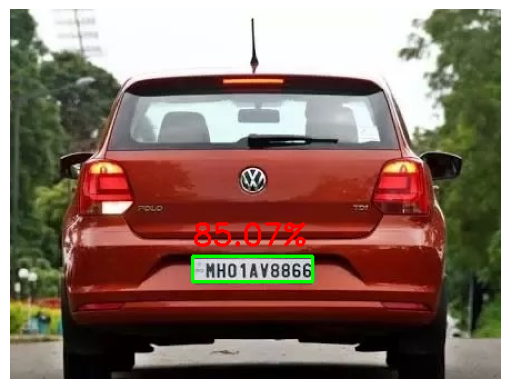

In [17]:
test_img = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/datasets/cars_license_plate_new/test/images/Cars9.png"

predict_and_plot_text(test_img)

In [ ]:
test_img = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/datasets/cars_license_plate_new/test/images/Cars39.png"
predict_and_plot_text(test_img)

In [ ]:
test_img = "C:/Users/singh/College assignemnt/Resume Projects/Object detection/datasets/cars_license_plate_new/test/images/Cars30.png"
predict_and_plot_text+(test_img)